In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir(globals()['_dh'][0])
os.chdir('..')

import numpy as np
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt

import rfcutils
get_pow = lambda s: np.mean(np.abs(s)**2)
get_sinr = lambda s1, s2: 10*np.log10(get_pow(s1)/get_pow(s2))
get_mse = lambda s: np.mean(np.abs(s)**2)

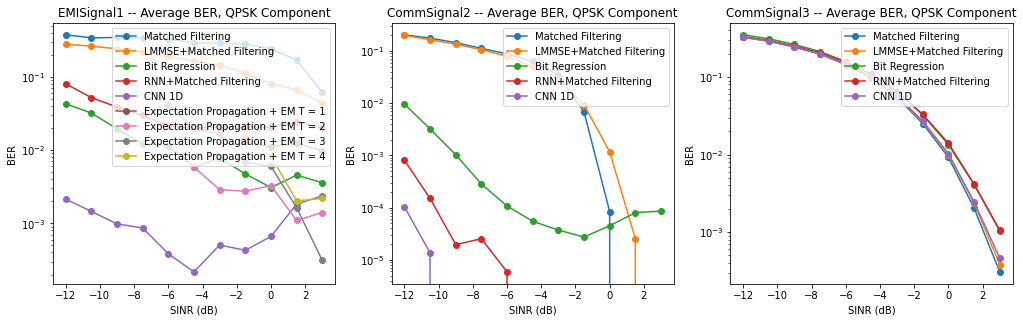

In [24]:
plt.figure(figsize=(17.2, 4.8)) 

val_or_test = 'val'

# folder name
# 
# 
all_figs = [
    ['CNN1D',
     'CNN',
     'CNN 1D'],
    ['expectation_propagation',
    'expectation_propagation_T_1_EP_EM',
    'Expectation Propagation + EM T = 1'],
    ['expectation_propagation',
    'expectation_propagation_T_2_EP_EM',
    'Expectation Propagation + EM T = 2'],
    ['expectation_propagation',
    'expectation_propagation_T_3_EP_EM',
    'Expectation Propagation + EM T = 3'],
    ['expectation_propagation',
    'expectation_propagation_T_4_EP_EM',
    'Expectation Propagation + EM T = 4'],
]

all_figs = np.array(all_figs)

all_folders = all_figs[:,0]
all_file_name = all_figs[:,1]
all_method_name = all_figs[:,2]

# 0 'Matched Filtering'
# 1 'LMMSE+Matched Filtering'
# 2 'Bit Regression'
# 3 'RNN+Matched Filtering'
IDPLOTBASELINE = np.array([0,1,2,3])

all_ref_str = ['EMISignal1', 'CommSignal2', 'CommSignal3']




for i in range(len(all_ref_str)):
    baseline_ber = pickle.load(open(os.path.join('example','baseline','demod_val_ber.pickle'), 'rb'))
    baseline_keys = np.array(list(baseline_ber[all_ref_str[i]].keys()))
    plt.subplot(1, 3, i+1)
    sinr_axis = np.array([3, 1.5, 0, -1.5, -3, -4.5, -6, -7.5, -9, -10.5, -12])
    for m in range(len(IDPLOTBASELINE)):
        plt.semilogy(sinr_axis, baseline_ber[all_ref_str[i]][baseline_keys[IDPLOTBASELINE[m]]]["mean"], 'o-')
    for m in range(len(all_folders)):            
        if all_file_name[m] != "CNN":
            try:
                all_ber, all_default_ber, all_sdr, all_sinr = pickle.load(open(os.path.join(all_folders[m],'output',f'{all_file_name[m]}_{all_ref_str[i]}_{val_or_test}_demod.pickle'), 'rb'))
            except:
                continue
        else:
            all_ber, all_default_ber, all_sinr = pickle.load(open(os.path.join(all_folders[m],'output',f'{all_file_name[m]}_{all_ref_str[i]}_{val_or_test}_demod.pickle'), 'rb'))
        mean_ber_per_sinr = np.array(all_ber).reshape(-1,100).mean(axis=1)
        mean_default_ber_per_sinr = np.array(all_default_ber).reshape(-1,100).mean(axis=1)
        sinr_axis = np.array(all_sinr).reshape(-1,100).mean(axis=1)

        # if m == 0:
        #     plt.semilogy(sinr_axis, mean_default_ber_per_sinr, 'x-')
        plt.semilogy(sinr_axis, mean_ber_per_sinr, 'o-')

    plt.title(f'{all_ref_str[i]} -- Average BER, QPSK Component')
    plt.xlabel('SINR (dB)')
    plt.ylabel('BER')
    # if i == 2:
    #     plt.legend(list(baseline_keys[IDPLOTBASELINE]) + list(all_method_name), loc="lower left")
    plt.legend(list(baseline_keys[IDPLOTBASELINE]) + list(all_method_name), loc="upper right")
    